# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

Импортируем необходимые библиотеки, модели, метрики и другое, что пригодится в исследовании:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV


import warnings
warnings.filterwarnings('ignore')
state = np.random.RandomState(12345)

<div class="alert alert-block alert-success">
<b>Успех:</b> Отлично, что все импорты собраны в первой ячейке ноутбука! Если у того, кто будет запускать твой ноутбук будут отсутствовать некоторые библиотеки, то он это увидит сразу, а не в процессе!
</div>

**Загрузим и изучим данные:**

In [2]:
data_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
data_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
data_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')

**Общая информация:**

In [3]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


In [4]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

In [5]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [6]:
data_full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [7]:
data_test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [8]:
data_train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


Посмотрим на дубликаты:

In [9]:
data_test['date'].duplicated().sum()

0

In [10]:
data_train['date'].duplicated().sum()

0

In [11]:
data_full['date'].duplicated().sum()

0

Рассмотрим уникальные значения и пропуски. Создадим функцию:

In [12]:
def un_values(data):
    for column in data.columns:
        print('Уникальные значения столбца: ', column)
        print(data[column].unique())
    print('Количество пропусков в каждом столбце: ')    
    print(data.isna().sum())

In [13]:
un_values(data_train)

Уникальные значения столбца:  date
['2016-01-15 00:00:00' '2016-01-15 01:00:00' '2016-01-15 02:00:00' ...
 '2018-08-18 08:59:59' '2018-08-18 09:59:59' '2018-08-18 10:59:59']
Уникальные значения столбца:  final.output.concentrate_ag
[6.05540276 6.02936857 6.05592607 ... 3.10999751 3.36724104 3.59837494]
Уникальные значения столбца:  final.output.concentrate_pb
[ 9.88964844  9.9689441  10.21399457 ... 11.43436599 11.62558728
 11.7378318 ]
Уникальные значения столбца:  final.output.concentrate_sol
[5.50732422 5.25778148 5.38375877 ... 6.88601311 6.79943261 6.71750947]
Уникальные значения столбца:  final.output.concentrate_au
[42.19202042 42.70162925 42.65750061 ... 46.79569097 46.40818768
 46.29943814]
Уникальные значения столбца:  final.output.recovery
[70.54121591 69.26619763 68.11644507 ... 67.00218885 65.52324622
 70.28145415]
Уникальные значения столбца:  final.output.tail_ag
[10.41196156 10.46267568 10.50704594 ...  8.52960609  8.77717133
  8.40668973]
Уникальные значения столбца:  

In [14]:
un_values(data_test)

Уникальные значения столбца:  date
['2016-09-01 00:59:59' '2016-09-01 01:59:59' '2016-09-01 02:59:59' ...
 '2017-12-31 21:59:59' '2017-12-31 22:59:59' '2017-12-31 23:59:59']
Уникальные значения столбца:  primary_cleaner.input.sulfate
[210.800909   215.39245478 215.25994647 ... 171.13571781 179.6971576
 181.55685577]
Уникальные значения столбца:  primary_cleaner.input.depressant
[14.99311769 14.9874713  12.8849338  ... 15.99366947 15.43897911
 14.99584972]
Уникальные значения столбца:  primary_cleaner.input.feed_size
[8.07999992 7.78666669 7.63999987 ... 7.88999927 7.57333384 7.96666576]
Уникальные значения столбца:  primary_cleaner.input.xanthate
[1.00502133 0.99046929 0.99604317 ... 1.16599581 1.50106793 1.62345438]
Уникальные значения столбца:  primary_cleaner.state.floatbank8_a_air
[1398.98130127 1398.77791158 1398.49366613 ... 1498.83618207 1498.46624268
 1498.09630329]
Уникальные значения столбца:  primary_cleaner.state.floatbank8_a_level
[-500.22557739 -500.05743464 -500.86835986

In [15]:
un_values(data_full)

Уникальные значения столбца:  date
['2016-01-15 00:00:00' '2016-01-15 01:00:00' '2016-01-15 02:00:00' ...
 '2018-08-18 08:59:59' '2018-08-18 09:59:59' '2018-08-18 10:59:59']
Уникальные значения столбца:  final.output.concentrate_ag
[6.05540276 6.02936857 6.05592607 ... 3.10999751 3.36724104 3.59837494]
Уникальные значения столбца:  final.output.concentrate_pb
[ 9.88964844  9.9689441  10.21399457 ... 11.43436599 11.62558728
 11.7378318 ]
Уникальные значения столбца:  final.output.concentrate_sol
[5.50732422 5.25778148 5.38375877 ... 6.88601311 6.79943261 6.71750947]
Уникальные значения столбца:  final.output.concentrate_au
[42.19202042 42.70162925 42.65750061 ... 46.79569097 46.40818768
 46.29943814]
Уникальные значения столбца:  final.output.recovery
[70.54121591 69.26619763 68.11644507 ... 67.00218885 65.52324622
 70.28145415]
Уникальные значения столбца:  final.output.tail_ag
[10.41196156 10.46267568 10.50704594 ...  8.52960609  8.77717133
  8.40668973]
Уникальные значения столбца:  

In [16]:
print('Количество пропусков в тестовой выборке: ', data_test.isnull().sum().sum())
print('Количество пропусков в обучающей выборке: ', data_train.isnull().sum().sum())
print('Количество пропусков в полной выборке: ', data_full.isnull().sum().sum())

Количество пропусков в тестовой выборке:  90
Количество пропусков в обучающей выборке:  4100
Количество пропусков в полной выборке:  4481


С данными ознакомились. Дубликатов нет, отдано есть пропуски в каждой выборке. Подробнее с ними разберемся позднее во время предобработки.

<div class="alert alert-block alert-success">
<b>Успех:</b> Данные загружены и осмотрены корректно.
</div>

Проверим правильность расчета эффективности обогащения. Вычислим её на обучающей выборке для признака rougher.output.recovery. Найдем MAE:

In [17]:
data_train['recovery'] = (data_train['rougher.output.concentrate_au']*(data_train['rougher.input.feed_au'] - data_train['rougher.output.tail_au']))/(data_train['rougher.input.feed_au']*(data_train['rougher.output.concentrate_au'] - data_train['rougher.output.tail_au']))*100

In [18]:
c = data_train['rougher.output.concentrate_au']
f = data_train['rougher.input.feed_au']
t = data_train['rougher.output.tail_au']
output_recovery = data_train['rougher.output.recovery']
all_recovery = c * (f - t) / f/ (c - t) * 100
print('Абсолютная средняя ошибка (MAE): ', mean_absolute_error(output_recovery, all_recovery))

Абсолютная средняя ошибка (MAE):  1.0748911125799084e-14


Полученное значения МАЕ довольно низкое, то есть  эффективность обогащения рассчитана правильно.

<div class="alert alert-block alert-success">
<b>Успех:</b> Абсолютно верно!
</div>

**Проанализируем признаки, недоступные в тестовой выборке.**
Создадим копию data_train, чтобы убрать из нее совпадающие поля из data_test

In [19]:
data_train_copy = data_train.copy()
data_train_copy = data_train_copy.drop(columns=list(data_test.columns))
data_train_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 35 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         14148 non-null  float64
 1   final.output.concentrate_pb                         14148 non-null  float64
 2   final.output.concentrate_sol                        13938 non-null  float64
 3   final.output.concentrate_au                         14149 non-null  float64
 4   final.output.recovery                               14149 non-null  float64
 5   final.output.tail_ag                                14149 non-null  float64
 6   final.output.tail_pb                                14049 non-null  float64
 7   final.output.tail_sol                               14144 non-null  float64
 8   final.output.tail_au                                14149 non-null  float64


В тестовой выборке отсутствуют данные, которые получаются на выходе (output) по таким этапам обработки, как  rougher , оба cleaner,  final. Скорее всего это те  данные, которые получаются по факту реальных измерений. Соответственно, мы их добавим в тестовую, но только чтобы модель обучилась для качественного предсказания значений, которые пояаляются на определенном этапе производства.

Целевые значения: rougher.output.recovery и final.output.recovery

<div class="alert alert-block alert-success">
<b>Успех:</b> Верно.
</div>

**Предобработка данных:**

Заполняем пропуски в данных ближайшими значениями, а также в целевых столбцах:

In [20]:
data_train=data_train.dropna(subset=['rougher.output.recovery','final.output.recovery'])
data_full=data_full.dropna(subset=['rougher.output.recovery','final.output.recovery'])

In [21]:
data_test = data_test.fillna(method='bfill')
data_train = data_train.fillna(method='bfill')
data_full = data_full.fillna(method='bfill')

<div class="alert alert-block alert-success">
<b>Успех:</b> В данном случае это наиболее подходящий метод для заполнения пропусков.
</div>

Перенесем  по индексу значения столбцов rougher.output.recovery и final.output.recovery в тестовую выборки:

In [22]:
merge_full = data_full[['date','rougher.output.recovery','final.output.recovery']]
data_test = data_test.merge(merge_full, on='date', how='left')

Также удалим из data_train столбцы, которых нет в тестовой выборке:

In [23]:
data_train=data_train[data_test.columns]

<div class="alert alert-block alert-success">
<b>Успех:</b> Радует, что merge проводился по дате!
</div>

Еще раз посмотрим на данные:

In [24]:
print(data_train.shape)
print(data_test.shape)

(14149, 55)
(5290, 55)


In [25]:
print('Количество пропусков в тестовой выборке: ', data_test.isnull().sum().sum())
print('Количество пропусков в обучающей выборке: ', data_train.isnull().sum().sum())
print('Количество пропусков в полной выборке: ', data_full.isnull().sum().sum())

Количество пропусков в тестовой выборке:  0
Количество пропусков в обучающей выборке:  0
Количество пропусков в полной выборке:  0


**Вывод:**
1. Открыты и изучены данные;
2. Проведен расчет эффективности обогащения и получен MAE, сделано вывод, что эффективность обогащения рассчитана правильно;
3. Проанализированы данные, отсутствующие в тестовой выборке. Отсутствующие данные касаются значений, которые получаются после проведения операций (output), то есть в реальности они и не могли быть в data_test(модель по прогнозу нужно построить);
4. Дубликатов нет, обработаны пропуски;
5. Целевые признаки: rougher.output.recovery,final.output.recovery

<div class="alert alert-block alert-success">
<b>Успех:</b> Этот шаг был сделан хорошо!
</div>

## Анализ данных

**Построим графики концентрации веществ на каждом этапе:**

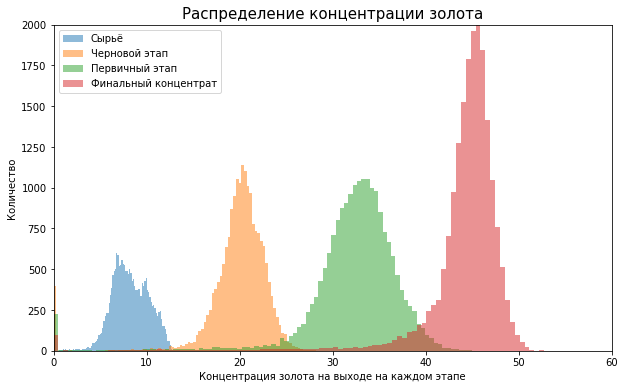

In [26]:
plt.figure(figsize=[10,6])
    
plt.hist(data_full['rougher.input.feed_au'], bins=100, label = 'Сырьё', alpha=.5)
plt.hist(data_full['rougher.output.concentrate_au'], bins=100, label = 'Черновой этап', alpha=.5)
plt.hist(data_full['primary_cleaner.output.concentrate_au'], bins=100, label = 'Первичный этап',
         alpha=.5)
plt.hist(data_full['final.output.concentrate_au'], bins=100, label = 'Финальный концентрат', alpha=.5)
    
    
plt.xlim([0, 60])
plt.ylim([0, 2000])
    
plt.xlabel('Концентрация золота на выходе на каждом этапе')
plt.ylabel('Количество')
    
plt.legend(loc='upper left')
    
plt.title('Распределение концентрации золота', fontsize=15)
plt.show()

Коцентрация золота с каждым этапом повышается, то есть достигается цель флотации и очисток.

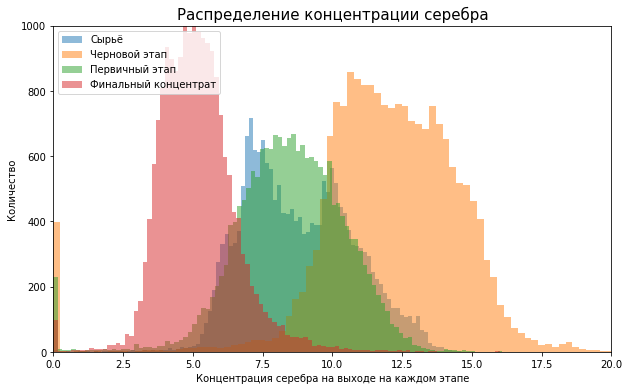

In [27]:
plt.figure(figsize=[10,6])
    
plt.hist(data_full['rougher.input.feed_ag'], bins=100, label = 'Сырьё', alpha=.5)
plt.hist(data_full['rougher.output.concentrate_ag'], bins=100, label = 'Черновой этап', alpha=.5)
plt.hist(data_full['primary_cleaner.output.concentrate_ag'], bins=100, label = 'Первичный этап',
         alpha=.5)
plt.hist(data_full['final.output.concentrate_ag'], bins=100, label = 'Финальный концентрат', alpha=.5)
    
    
plt.xlim([0, 20])
plt.ylim([0, 1000])
    
plt.xlabel('Концентрация серебра на выходе на каждом этапе')
plt.ylabel('Количество')
    
plt.legend(loc='upper left')
    
plt.title('Распределение концентрации серебра', fontsize=15)
plt.show()

У серебра, в отличие от золота, концентрация с каждым этапом снижается. Логично, так как основная цель - получение золота, в то время как остальные металлы необходимо отфильтровать.

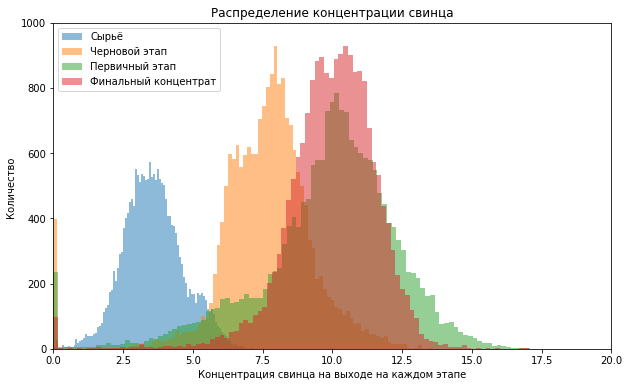

In [28]:
plt.figure(figsize=[10,6])
    
plt.hist(data_full['rougher.input.feed_pb'], bins=100, label = 'Сырьё', alpha=.5)
plt.hist(data_full['rougher.output.concentrate_pb'], bins=100, label = 'Черновой этап', alpha=.5)
plt.hist(data_full['primary_cleaner.output.concentrate_pb'], bins=100, label = 'Первичный этап',
         alpha=.5)
plt.hist(data_full['final.output.concentrate_pb'], bins=100, label = 'Финальный концентрат', alpha=.5)
    
    
plt.xlim([0, 20])
plt.ylim([0, 1000])
    
plt.xlabel('Концентрация свинца на выходе на каждом этапе')
plt.ylabel('Количество ')
    
plt.legend(loc='upper left')
    
plt.title('Распределение концентрации свинца')
plt.show()

Свинец занимает промежуточное положение, уведичивается содержание при первичной обработки. Возможно, это связано с процессом очищения золота на данном этапе, когда используются соединения свинца для химической реакции.

**Построим графики для каждого этапа:**

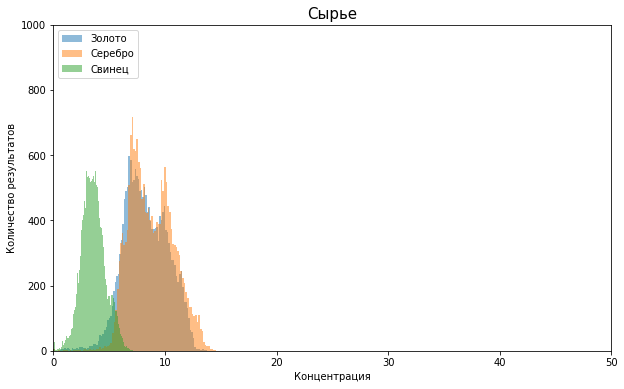

In [29]:
plt.figure(figsize=[10,6])
    
plt.hist(data_full['rougher.input.feed_au'], bins=100, label = 'Золото', alpha=.5)
plt.hist(data_full['rougher.input.feed_ag'], bins=100, label = 'Серебро', alpha=.5)
plt.hist(data_full['rougher.input.feed_pb'], bins=100, label = 'Свинец',alpha=.5)

    
plt.xlim([0, 50])
plt.ylim([0, 1000])
    
plt.xlabel('Концентрация')
plt.ylabel('Количество результатов')
    
plt.legend(loc='upper left')
    
plt.title('Сырье', fontsize=15)
plt.show()

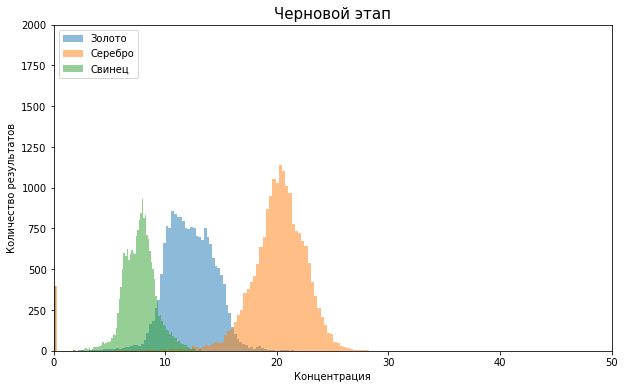

In [30]:
plt.figure(figsize=[10,6])
    
plt.hist(data_full['rougher.output.concentrate_ag'], bins=100, label = 'Золото', alpha=.5)
plt.hist(data_full['rougher.output.concentrate_au'], bins=100, label = 'Серебро', alpha=.5)
plt.hist(data_full['rougher.output.concentrate_pb'], bins=100, label = 'Свинец',
         alpha=.5)

    
plt.xlim([0, 50])
plt.ylim([0, 2000])
    
plt.xlabel('Концентрация')
plt.ylabel('Количество результатов')
    
plt.legend(loc='upper left')
    
plt.title('Черновой этап', fontsize=15)
plt.show()

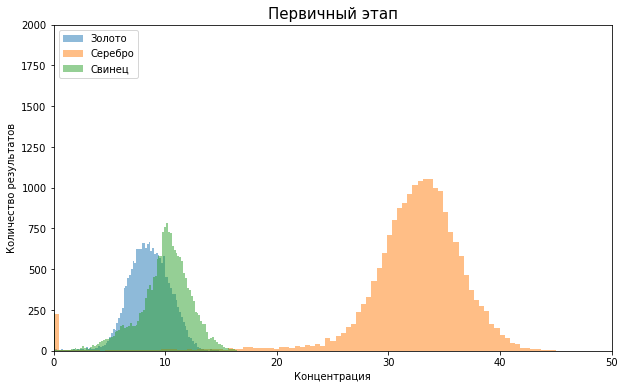

In [31]:
plt.figure(figsize=[10,6])
    
plt.hist(data_full['primary_cleaner.output.concentrate_ag'], bins=100, label = 'Золото', alpha=.5)
plt.hist(data_full['primary_cleaner.output.concentrate_au'], bins=100, label = 'Серебро', alpha=.5)
plt.hist(data_full['primary_cleaner.output.concentrate_pb'], bins=100, label = 'Свинец', alpha=.5)

    
plt.xlim([0, 50])
plt.ylim([0, 2000])
    
plt.xlabel('Концентрация')
plt.ylabel('Количество результатов')
    
plt.legend(loc='upper left')
    
plt.title('Первичный этап', fontsize=15)
plt.show()

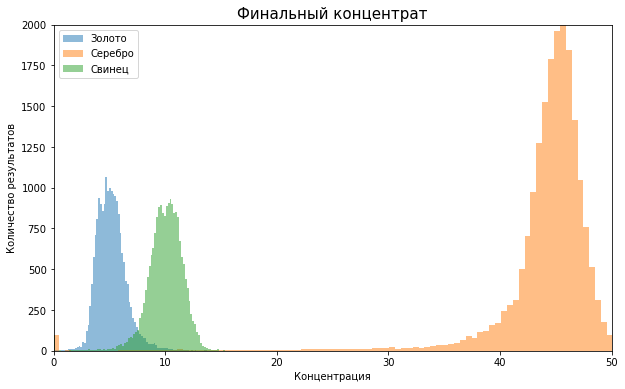

In [32]:
plt.figure(figsize=[10,6])
    
plt.hist(data_full['final.output.concentrate_ag'], bins=100, label = 'Золото', alpha=.5)
plt.hist(data_full['final.output.concentrate_au'], bins=100, label = 'Серебро', alpha=.5)
plt.hist(data_full['final.output.concentrate_pb'], bins=100, label = 'Свинец', alpha=.5)

    
plt.xlim([0, 50])
plt.ylim([0, 2000])
    
plt.xlabel('Концентрация')
plt.ylabel('Количество результатов')
    
plt.legend(loc='upper left')
    
plt.title('Финальный концентрат', fontsize=15)
plt.show()

В целом, результаты совпадают с гистограммами для веществ по отдельности. Видно увеличение концентрации золота, а также снижение для серебра и свинца.

<div class="alert alert-block alert-success">
<b>Успех:</b> Отличная визуализация!
</div>

**Рассмотрим распределение размеров гранул сырья на обучающей и тестовой выборках.**

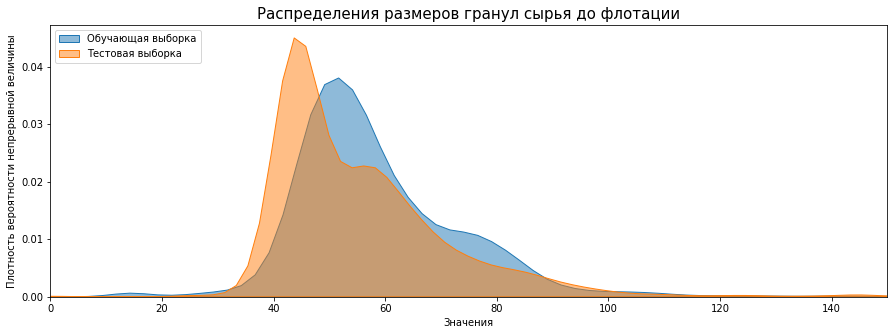

In [33]:
plt.figure(figsize=(15, 5))
sns.kdeplot(data_train['rougher.input.feed_size'], alpha=0.5, shade=True)
sns.kdeplot(data_test['rougher.input.feed_size'], alpha=0.5, shade=True)
plt.xlim([0, 150])
plt.xlabel('Значения')
plt.ylabel('Плотность вероятности непрерывной величины')
plt.legend(['Обучающая выборка','Тестовая выборка'], loc='upper left')
plt.title('Распределения размеров гранул сырья до флотации', fontsize=15)
plt.show()


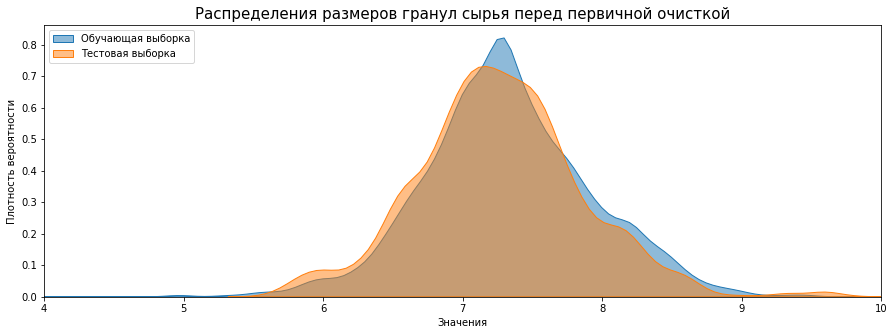

In [34]:
plt.figure(figsize=(15, 5))
sns.kdeplot(data_train['primary_cleaner.input.feed_size'], alpha=0.5, shade=True)
sns.kdeplot(data_test['primary_cleaner.input.feed_size'], alpha=0.5, shade=True)
plt.xlim([4, 10])
plt.xlabel('Значения')
plt.ylabel('Плотность вероятности')
plt.legend(['Обучающая выборка','Тестовая выборка'], loc='upper left')
plt.title('Распределения размеров гранул сырья перед первичной очисткой', fontsize=15)

plt.show()

Распределение гранул похоже нормальное и почти совпадают. Прослеживаются выбросы до флотации в размерах гранул свыше 100.

<div class="alert alert-block alert-success">
<b>Успех:</b> Хорошо, что в этом шаге ты перешел к долям!
</div>

**Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах:**

In [35]:
def sum_сon(data,concentrat_ag,concentrat_au,concentrat_pb,concentrat_sol):
    ag=data[concentrat_ag]
    au=data[concentrat_au]
    pb=data[concentrat_pb]
    sol=data[concentrat_sol]
    sum_things =ag+au+pb+sol
    
    plt.figure(figsize=(14,6))
    sum_things.plot.hist(bins=100)
    plt.title('Cуммарная концентрация')
    plt.xlabel('Значения')
    plt.ylabel('Количество')
    plt.grid(True)
    plt.show()

**В сырье:**

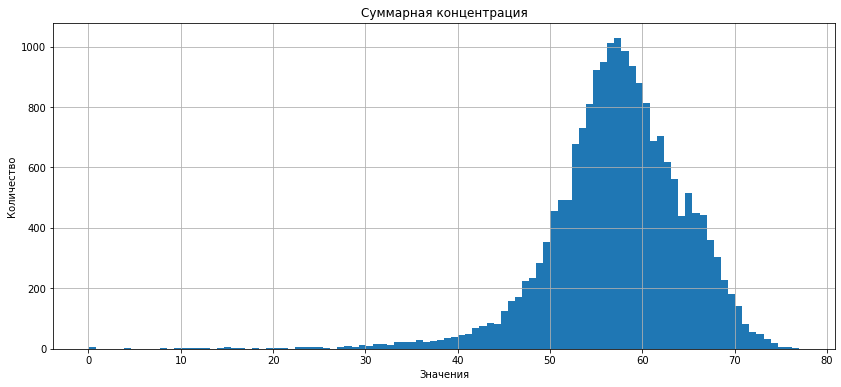

In [36]:
sum_сon(data_full,'rougher.input.feed_ag','rougher.input.feed_au','rougher.input.feed_pb','rougher.input.feed_sol')

**В черновом концентрате:**

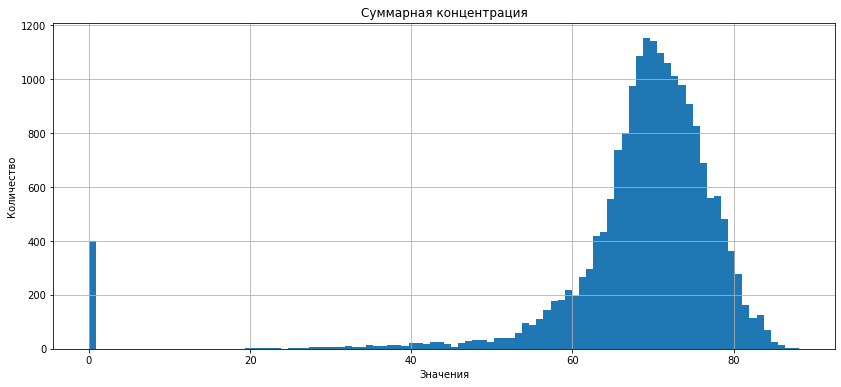

In [37]:
sum_сon(data_full,'rougher.output.concentrate_ag','rougher.output.concentrate_au','rougher.output.concentrate_pb','rougher.output.concentrate_sol')

**В финальном концентрате:**

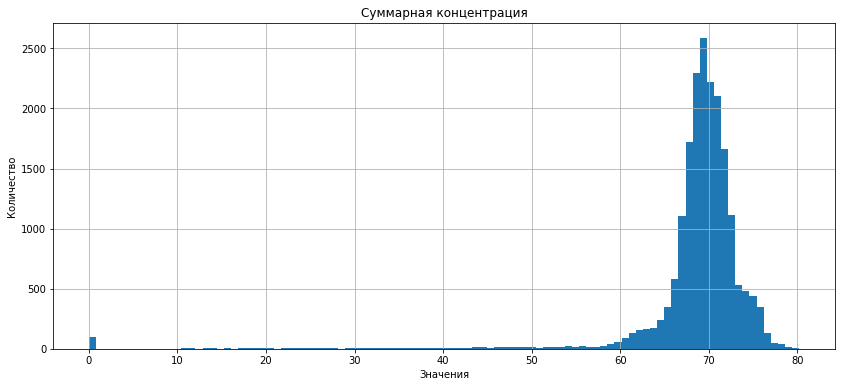

In [38]:
sum_сon(data_full,'final.output.concentrate_ag','final.output.concentrate_au','final.output.concentrate_pb','final.output.concentrate_sol')

В целом, суммарная концентраци на этапах обработки имеет нормальное распределение. Однако также присутствуют аномалии в размере 0.

Добавим полученные данные в выборки:

In [39]:
def sum_plus(data,concentrat_ag,concentrat_au,concentrat_pb,concentrat_sol):
    ag=data[concentrat_ag]
    au=data[concentrat_au]
    pb=data[concentrat_pb]
    sol=data[concentrat_sol]
    sum_things=ag+au+pb+sol
    data = sum_things
    return data

In [40]:
data_full['sum_concentration'] = sum_plus(data_full,'final.output.concentrate_ag','final.output.concentrate_au','final.output.concentrate_pb','final.output.concentrate_sol')

In [41]:
data_merge=data_full[['date','sum_concentration']]
data_train = data_train.merge(data_merge, on='date', how='left')
data_test = data_test.merge(data_merge, on='date', how='left')

Также удалим обнаруженные аномалии. Судя по гистограммам, пороговым значением сделаем 50:

In [42]:
def con_clean(data,sum_concentrat,threshold):
    data=data[data[sum_concentrat] > threshold]
    print(data[sum_concentrat].describe())
    return data

In [43]:
data_full = con_clean(data_full,'sum_concentration', 50)

count    19033.000000
mean        69.557791
std          3.293078
min         50.098603
25%         68.063144
50%         69.667046
75%         71.408985
max         80.210644
Name: sum_concentration, dtype: float64


In [44]:
data_train = con_clean(data_train,'sum_concentration', 50)

count    13896.000000
mean        69.171068
std          3.335674
min         50.098603
25%         67.680674
50%         69.194361
75%         71.020673
max         80.210644
Name: sum_concentration, dtype: float64


In [45]:
data_test = con_clean(data_test,'sum_concentration', 50)

count    5137.000000
mean       70.603908
std         2.929738
min        50.337818
25%        69.456337
50%        70.762467
75%        72.110374
max        79.977670
Name: sum_concentration, dtype: float64


Также удаляем столбцы из обучающей и тестовой выборок: 

In [46]:
data_train = data_train.drop(['sum_concentration'], axis=1)
data_test = data_test.drop(['sum_concentration'], axis=1)

Осталось рассмотреть целевые признаки, удалить аномальные значения:

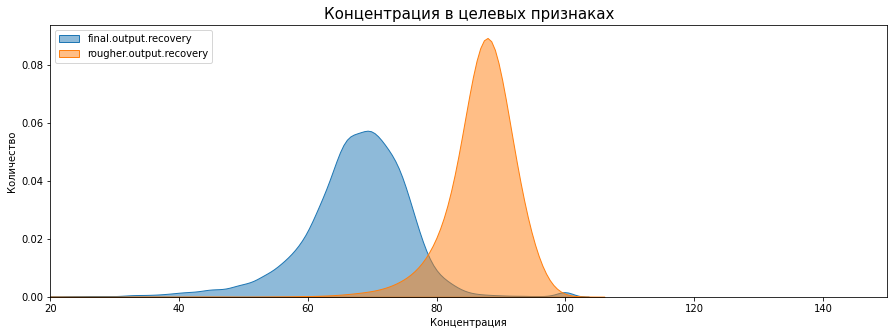

In [47]:
plt.figure(figsize=(15, 5))
sns.kdeplot(data_full['final.output.recovery'], alpha=0.5, shade=True)
sns.kdeplot(data_test['rougher.output.recovery'], alpha=0.5, shade=True)
plt.xlim([20, 150])
plt.xlabel('Концентрация')
plt.ylabel('Количество')
plt.legend(['final.output.recovery','rougher.output.recovery'], loc='upper left')
plt.title('Концентрация в целевых признаках', fontsize=15)

plt.show()

Удалим также аномалии. Установим следующие пороговые концентрации:
1. Для rougher.output.recovery 60;
2. Для final.output.recovery 40.

In [48]:
data_full = con_clean(data_full,'rougher.output.recovery', 60)

count    18516.000000
mean        85.479666
std          6.601077
min         60.044710
25%         81.693699
50%         86.510312
75%         90.173024
max        100.000000
Name: rougher.output.recovery, dtype: float64


In [49]:
data_full = con_clean(data_full,'final.output.recovery', 40)

count    18371.000000
mean        67.941659
std          7.682910
min         40.092124
25%         63.837525
50%         68.398897
75%         72.779553
max        100.000000
Name: final.output.recovery, dtype: float64


Аналогичную операцию проделаем для обучающей и тестовой выборок:

In [50]:
def con_clean1(data,c1,c2,t1,t2):
    data=data[data[c1] > t1]
    data=data[data[c2] > t2]
    return data

In [51]:
data_train = con_clean1(data_train,'rougher.output.recovery','final.output.recovery',60,40)
data_test = con_clean1(data_test,'rougher.output.recovery','final.output.recovery',60,40)

**Вывод:**
1. Были изучены концентрации веществ на разных этапах очистки, размеры гранул и суммарная концентрация, построены для них графики;
2. Выяснено, что концентрация золота увеличивается с каждым этапом обработки (кроме отвала); 
2. Удалены аномалии в данных, подготовлены данные для прогнозирования.

<div class="alert alert-block alert-success">
<b>Успех:</b> Отлично, что аномалии ыбли удалены по суммарной концетрации.
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> А вот по целевой колонке не стоит удалять аномалии, так как нет доказательства, что это ошибки
</div>

## Модель

Перед обучением моделей выделим целевые признаки, присвоим их переменные для каждой из выборок, а также проведем масштабирование данных для качественного обучения моделей **на обучающей выборке:**

In [52]:
data_train=data_train.drop('date',axis=1)
train_features = data_train.drop(['rougher.output.recovery','final.output.recovery'], axis=1)
train_target_r = data_train['rougher.output.recovery']
train_target_f = data_train['final.output.recovery']

In [53]:
numeric = train_features.columns
scaler_rougher = StandardScaler()
scaler_rougher.fit(train_features[numeric]) 
train_features[numeric] = scaler_rougher.transform(train_features[numeric])

Аналогично сделаем с **тестовой выборкой:**

In [54]:
data_test=data_test.drop('date',axis=1)
test_features = data_test.drop(['rougher.output.recovery','final.output.recovery'], axis=1)
test_target_r = data_test['rougher.output.recovery']
test_target_f = data_test['final.output.recovery']

In [55]:
numeric1 = test_features.columns

test_features[numeric] = scaler_rougher.transform(test_features[numeric1])

Напишем функцию для вычисления **итоговой sMAPE.**

In [56]:
def smape(y_true, y_pred):
    smape_score = np.mean(abs(y_true - y_pred)/((abs(y_true)+abs(y_pred))/2))*100*(-1)
    return smape_score

In [57]:
def final_smape(smape_rougher, smape_final):
    return (0.25*smape_rougher + 0.75*smape_final).round(2)

Создадим модели для ougher.output.recovery и final.output.recovery, посмотрим на результаты:

In [58]:
model_const_r=DummyRegressor(strategy="median")
model_const_r.fit(train_features,train_target_r)
predict_const_model_r=cross_val_score(model_const_r,train_features,train_target_r, cv=5, scoring=make_scorer(smape, greater_is_better=False)).mean()
predict_const_model_r.round(2)

7.25

In [59]:
model_const_f=DummyRegressor(strategy="median")
model_const_f.fit(train_features,train_target_f)

predict_const_model_f =cross_val_score(model_const_f,train_features,train_target_f, cv=5, scoring=make_scorer(smape, greater_is_better=False)).mean()
predict_const_model_f.round(2)

9.24

In [60]:
const_model_smape = final_smape(predict_const_model_r,predict_const_model_f)
print('Итоговое значение sMAPE: ', const_model_smape)

Итоговое значение sMAPE:  8.74


Цель для достижения определена, можно переходить к моделям.



**Дерево решений:**

In [61]:
def cross_v(model):
    score_val = (cross_val_score(model, train_features, train_target_r, cv=5, scoring=make_scorer(smape, greater_is_better=True))).mean() 
    print('Cреднее значение sMAPE для rougher: ',-1*score_val.round(2))

    
    score_val_f = (cross_val_score(model, train_features, train_target_f, cv=5, scoring=make_scorer(smape, greater_is_better=True))).mean() 
    print('Cреднее значение sMAPE для final: ',-1*score_val_f.round(2))

    fin_score_smape= final_smape(score_val,score_val_f)
    print('Итоговое sMAPE модели на кросс-валидации: ',-1*fin_score_smape.round(2)) 

In [62]:
%%time
cross_v(DecisionTreeRegressor(random_state=12345))

Cреднее значение sMAPE для rougher:  8.59
Cреднее значение sMAPE для final:  13.66
Итоговое sMAPE модели на кросс-валидации:  12.39
CPU times: user 7.54 s, sys: 0 ns, total: 7.54 s
Wall time: 7.56 s


С помощью цикла подберем оптимальное количество деревьев:

Для признака rougher.output.recovery

In [63]:
%%time
best_model = None
best_result_r = 100
best_depth = 0
for depth in tqdm(range(1,15)):
    model_dr = DecisionTreeRegressor(random_state=12345, max_depth=depth)
    result = cross_val_score(model_dr,train_features,train_target_r, cv=5, scoring=make_scorer(smape, greater_is_better=False)).mean()
    if result < best_result_r:
        best_model = model_dr
        best_result_r = result.round(2)
        best_depth = depth

print('Значение sMAPE  модели для rougher.output.recovery: ', best_result_r, '\nКоличество деревьев:', best_depth)

  0%|          | 0/14 [00:00<?, ?it/s]

Значение sMAPE  модели для rougher.output.recovery:  6.81 
Количество деревьев: 2
CPU times: user 23.6 s, sys: 58.8 ms, total: 23.7 s
Wall time: 23.7 s


Для final.output.recovery:

In [64]:
%%time
best_model = None
best_result_f = 100
best_depth_f = 0
for depth in tqdm(range(1, 15)):
    model_d = DecisionTreeRegressor(random_state=12345, max_depth=depth)
  
    result = cross_val_score(model_d, train_features, train_target_f, cv=5, scoring=make_scorer(smape, greater_is_better=False)).mean()
    if result < best_result_f:
        best_model = model_d
        best_result_f = result.round(2)
        best_depth_f = depth

print('Значение sMAPE  модели для final.output.recovery: ', best_result_f, "\nКоличество деревьев:", best_depth_f)


  0%|          | 0/14 [00:00<?, ?it/s]

Значение sMAPE  модели для final.output.recovery:  8.16 
Количество деревьев: 4
CPU times: user 24 s, sys: 78.4 ms, total: 24.1 s
Wall time: 24.2 s


Итоговый sMAPE Дерева решений:

In [65]:
fin_score_dtf = final_smape(best_result_r,best_result_f)
print(fin_score_dtf)

7.82


Также подберем параметры для дерева решений с помощью GridSearchCV.

Для  rougher.output.recovery:

In [66]:
%%time
parametrs_r = { 'max_depth': range (1,15) }
model_d = DecisionTreeRegressor(random_state=12345)  
grid_r = GridSearchCV(model_d, parametrs_r, cv=5, scoring=make_scorer(smape, greater_is_better=False))
grid_r.fit(train_features, train_target_r)
best_score_r = grid_r.best_score_
parametrs_r_gs = pd.Series(grid_r.best_params_)[0]
print('Значение sMAPE для rougher.output.recovery: {:.2f}'.format(best_score_r), '\nМаксимальная глубина:',parametrs_r_gs)

Значение sMAPE для rougher.output.recovery: 8.66 
Максимальная глубина: 12
CPU times: user 24.2 s, sys: 103 ms, total: 24.3 s
Wall time: 24.3 s


Для final.output.recovery:

In [67]:
%%time
parametrs_f = {'max_depth': range (1,15)}
model_df = DecisionTreeRegressor(random_state=12345)         
grid_r = GridSearchCV(model_df, parametrs_f, cv=5, scoring=make_scorer(smape, greater_is_better=False))
grid_r.fit(train_features, train_target_f)
parametrs_f_gs=pd.Series(grid_r.best_params_)[0]
best_score_f = grid_r.best_score_
print('Значение sMAPE для final.output.recovery: {:.2f}'.format(best_score_f), '\nМаксимальная глубина:',parametrs_f_gs)

Значение sMAPE для final.output.recovery: 13.46 
Максимальная глубина: 14
CPU times: user 25.1 s, sys: 31.5 ms, total: 25.1 s
Wall time: 25.3 s


Итоговый sMAPE для дерева решений с помощью GridSearchCV:

In [68]:
fin_score_dt= final_smape(best_score_r,best_score_f)
print(fin_score_dt) 

12.26


Перейдем к **Случайному лесу.**


Проделаем аналогичную кросс-валидацию, а также подберем параметры с помощью  GridSearchCV.

In [69]:
cross_v(RandomForestRegressor(random_state=12345))

Cреднее значение sMAPE для rougher:  6.32
Cреднее значение sMAPE для final:  8.3
Итоговое sMAPE модели на кросс-валидации:  7.8


Также подберем параметры с помощью GridSearchCV.

Для rougher.output.recovery:

In [70]:
%%time
parametrs = { 'n_estimators': range (1, 10, 2),
              'max_depth': range (1, 15, 2)}
model_rf = RandomForestRegressor(random_state=12345)
grid_rf = GridSearchCV(model_rf, parametrs, cv=5, scoring=make_scorer(smape, greater_is_better=False))
grid_rf.fit(train_features, train_target_r)

best_score_rf = -1*grid_rf.best_score_

parametrs_r_gs_d=pd.Series(grid_rf.best_params_)[0]
parametrs_r_gs_n=pd.Series(grid_rf.best_params_)[1]
print('Значение sMAPE для rougher.output.recovery: {:.2f}'. format(best_score_rf), '\nМаксимальная глубина:',parametrs_r_gs_d, '\nКоличество деревьев:',parametrs_r_gs_n)

Значение sMAPE для rougher.output.recovery: -8.35 
Максимальная глубина: 9 
Количество деревьев: 1
CPU times: user 2min 46s, sys: 448 ms, total: 2min 46s
Wall time: 2min 47s


Для final.output.recovery:

In [71]:
%%time
model_rff = RandomForestRegressor(random_state=12345)
grid_rff = GridSearchCV(model_rff, parametrs, cv=5, scoring=make_scorer(smape, greater_is_better=False))
grid_rff.fit(train_features, train_target_f)
result_gs_f= grid_rff.best_score_

parametrs_f_gs_d=pd.Series(grid_rff.best_params_)[0]
parametrs_f_gs_n=pd.Series(grid_rff.best_params_)[1]
print('Значение sMAPE для final.output.recovery: {:.2f}'.format(result_gs_f), '\nМаксимальная глубина:',parametrs_f_gs_d, '\nКоличество деревьев:',parametrs_f_gs_n)

Значение sMAPE для final.output.recovery: 11.86 
Максимальная глубина: 13 
Количество деревьев: 1
CPU times: user 2min 51s, sys: 488 ms, total: 2min 51s
Wall time: 2min 52s


Итоговый sMAPE для случайного леса с помощью GridSearchCV:

In [72]:
fin_score_rf= final_smape(best_score_rf,result_gs_f)
print(fin_score_rf)

6.81


С помощью цикла подберем параметры для случайного леса.

Для rougher.output.recovery:

In [87]:
%%time
best_model = None
best_result_r = 100
best_est_r = 0
best_depth_r = 0
for est in tqdm(range(1,10, 2)):
    for depth in tqdm(range (1,13,2), desc='depth loop', leave=False):
        model_rf = RandomForestRegressor(random_state=12345, n_estimators=est, max_depth=depth)

        result_rf = cross_val_score(model_rf, train_features, train_target_r, cv=5, scoring=make_scorer(smape, greater_is_better=False)).mean()
     

        if result_rf < best_result_r:
            best_model = model_rf
            best_result_r = result_rf
            best_est_r = est
            best_depth_r = depth

print('Значение sMAPE для rougher.output.recovery: ', best_result_r.round(2), '\nКоличество деревьев:', best_est_r, '\nМаксимальная глубина:', best_depth_r)

  0%|          | 0/5 [00:00<?, ?it/s]

depth loop:   0%|          | 0/6 [00:00<?, ?it/s]

depth loop:   0%|          | 0/6 [00:00<?, ?it/s]

depth loop:   0%|          | 0/6 [00:00<?, ?it/s]

depth loop:   0%|          | 0/6 [00:00<?, ?it/s]

depth loop:   0%|          | 0/6 [00:00<?, ?it/s]

Значение sMAPE для rougher.output.recovery:  6.21 
Количество деревьев: 7 
Максимальная глубина: 5
CPU times: user 2min 9s, sys: 335 ms, total: 2min 9s
Wall time: 2min 10s


Для final.output.recovery:

In [88]:
%%time
best_model = None
best_result_f = 100
best_est_f = 0
best_depth_f = 0
for est in tqdm(range(1,10, 2)):
    for depth in tqdm(range (1,13, 2), desc='depth loop', leave=False):
        model_rff = RandomForestRegressor(random_state=12345, n_estimators=est, max_depth=depth)
    
        result_rf = cross_val_score(model_rff,train_features,train_target_f, cv=5, scoring=make_scorer(smape, greater_is_better=False)).mean() 
        if result_rf < best_result_f:
            best_model = model_rff
            best_result_f = result_rf
            best_est_f = est
            best_depth_f = depth

print('Значение sMAPE для final.output.recovery: ', best_result_f.round(2), '\nКоличество деревьев:', best_est_f, '\nМаксимальная глубина:', best_depth_f)

  0%|          | 0/5 [00:00<?, ?it/s]

depth loop:   0%|          | 0/6 [00:00<?, ?it/s]

depth loop:   0%|          | 0/6 [00:00<?, ?it/s]

depth loop:   0%|          | 0/6 [00:00<?, ?it/s]

depth loop:   0%|          | 0/6 [00:00<?, ?it/s]

depth loop:   0%|          | 0/6 [00:00<?, ?it/s]

Значение sMAPE для final.output.recovery:  7.81 
Количество деревьев: 7 
Максимальная глубина: 5
CPU times: user 2min 12s, sys: 271 ms, total: 2min 12s
Wall time: 2min 12s


Итоговый sMAPE лучшей модели случайного леса:

In [89]:
fin_score_rff =final_smape(best_result_r,best_result_f)
print(fin_score_rff.round(2)) 

7.41


Перейдем к **линейной регрессии:**
Проделаем аналогичную кросс-валидацию, а также подберем параметры с помощью GridSearchCV.

In [90]:
cross_v(LinearRegression())

Cреднее значение sMAPE для rougher:  6.44
Cреднее значение sMAPE для final:  9.45
Итоговое sMAPE модели на кросс-валидации:  8.69


Подберем параметры через GridSearchCV.


Для rougher.output.recovery:

In [91]:
parametrs = { 'fit_intercept': [True],
              'normalize': [True, False]}

In [92]:
%time


model_lr_r = LinearRegression()
grid_lr_r = GridSearchCV(model_lr_r, parametrs, cv=5, scoring=make_scorer(smape))
grid_lr_r.fit(train_features, train_target_r)

fit_intercept_r=pd.Series(grid_lr_r.best_params_)[0]
normalize_r=pd.Series(grid_lr_r.best_params_)[1]

result_lr_r = grid_lr_r.best_score_
print('Значение sMAPE для rougher.output.recovery: {:.2f}'.format(result_lr_r), '\nfit_intercept:',fit_intercept_r, '\nnormalize:',normalize_r)


CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.39 µs
Значение sMAPE для rougher.output.recovery: -6.44 
fit_intercept: True 
normalize: True


Для final.output.recovery:

In [93]:
%time
model_lr_f = LinearRegression()
grid_lr_f = GridSearchCV(model_lr_f, parametrs, cv=5, scoring=make_scorer(smape,))
grid_lr_f.fit(train_features, train_target_f)

fit_intercept_f = pd.Series(grid_lr_f.best_params_)[0]
normalize_f = pd.Series(grid_lr_f.best_params_)[1]
result_lr_f= grid_lr_f.best_score_
print('Значение sMAPE для final.output.recovery: {:.2f}'.format(result_lr_f), '\nfit_intercept:',fit_intercept_f, '\nnormalize:',normalize_f)

CPU times: user 32 µs, sys: 1e+03 ns, total: 33 µs
Wall time: 9.06 µs
Значение sMAPE для final.output.recovery: -9.45 
fit_intercept: True 
normalize: True


Итоговое значение sMAPE:

In [94]:
fin_score_lr= final_smape(result_lr_r,result_lr_f)
print('Итоговое значение sMAPE модели Линейная регрессия: ',fin_score_lr) 

Итоговое значение sMAPE модели Линейная регрессия:  -8.69


**Вывод:**
Модель случайного леса показала наилучшие показатели при кросс-валидации, подборе гиперпараметров циклом и с помощью метода GridSearchCV. Предсказания и проверку будем строить на ней.

**Модель Случайный лес**

Для rougher.output.recovery:

In [95]:
model_rf_test_r = RandomForestRegressor(random_state=12345, n_estimators=best_est_r, max_depth=best_depth_r)
model_rf_test_r.fit(train_features, train_target_r) 
predictions_test_rf_r = model_rf_test_r.predict(test_features)
result_rf_test_r = -1*smape(test_target_r,predictions_test_rf_r)
result_rf_test_r.round(2)

3.91

Для final.output.recovery:

In [96]:
model_rf_test_f = RandomForestRegressor(random_state=12345, n_estimators=best_est_f, max_depth=best_depth_f)
model_rf_test_f.fit(train_features, train_target_f) 
predictions_test_rf_f = model_rf_test_f.predict(test_features)
result_rf_test_f = -1*smape(test_target_f,predictions_test_rf_f)
result_rf_test_f.round(2)

7.66

Посмотрим на итоговое sMAPE выбранной модели на тестовой выборке:

In [97]:
fin_score_test_rf = final_smape(result_rf_test_r, result_rf_test_f)
print(fin_score_test_rf)

6.73


Проверим результаты на **константной модели:**

Для rougher.output.recovery:

In [98]:
predict_const_model_rt = model_const_r.predict(test_features)
result_lr_const_rt = -1*smape(test_target_r,predict_const_model_rt)
result_lr_const_rt

4.349417299254603

Для final.output.recovery:

In [99]:
predict_const_model_ft = model_const_f.predict(test_features)
result_lr_const_ft = -1*smape(test_target_f,predict_const_model_ft)
result_lr_const_ft

7.649911431476047

Также итоговый sMAPE константной модели на тестовой выборке:

In [100]:
const_fin=final_smape(result_lr_const_rt,result_lr_const_ft)
print(const_fin) 

6.82


Можно сделать вывод при сравнении показателей модели случайного леса с константной модели, что предсказания модели адектавное. 

<div class="alert alert-block alert-success">
<b>Успех:</b> Молодец, что попробовал разные модели в этом шаге и не забыл про дамми проверку.
</div>

## Вывод

1. Были изучены и скорректированы данные;
2. Проведен исследовательский анализ данных;
3. Была написана функция для sMAPE. Каждая модель была изучена на качество с помощью методов кросс-валидации, цикла for поиска гиперпараметров GridSearchCV;
4. Была отобрана лучшая модель - DecisionTreeRegressor. Ее значение sMAPE самое низкое;
5. Модель прошла проверку на адекватность. Итоговая оценка sMAPE константной модели на тестовых данных равна 6.82.